# Import Packages 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
# Use seaborn style defaults and set the default figure size

sns.set(rc={'figure.figsize':(20, 10)})

In [ ]:
# Set seed for numpy and tensorflow

tf.random.set_seed(12)
np.random.seed(12)

# Pull the data sets (daily time frame)

In [ ]:
# Import the crypto data set from the relevant Github repo

daily_data_url = "https://raw.githubusercontent.com/DonaldTurton/iLab2/master/Merged_datasets/bit_eth_xrp_daily.csv"
daily_data = pd.read_csv (daily_data_url)
daily_data

,time,BTC_open,BTC_close,BTC_vol,ETHER_open,ETHER_close,ETHER_vol,XRP_open,XRP_close,XRP_vol
0,2017-05-19 00:00:00+00:00,1941.900000,1966.500000,23001.542773,98.550000,124.40,257956.362939,0.37999,0.32498,2.130933e+06
1,2017-05-20 00:00:00+00:00,1966.500000,2059.300000,21690.022393,124.490000,123.03,122882.371427,0.32499,0.34716,3.608873e+06
2,2017-05-21 00:00:00+00:00,2059.300000,2026.600000,17221.878675,123.490000,146.14,220184.308469,0.34700,0.32700,2.597807e+06
3,2017-05-22 00:00:00+00:00,2027.000000,2087.300000,57231.824243,146.140000,154.92,473706.454399,0.32700,0.29717,6.474949e+06
4,2017-05-23 00:00:00+00:00,2087.300000,2249.600000,22521.559138,155.160000,168.24,144988.858583,0.29912,0.32158,3.255225e+06
...,...,...,...,...,...,...,...,...,...,...
1169,2020-07-31 00:00:00+00:00,11122.785171,11350.000000,5830.145883,335.360000,346.82,145813.101733,0.24461,0.25983,1.913230e+07
1170,2020-08-01 00:00:00+00:00,11350.000000,11804.744013,10574.542594,346.814955,387.15,214176.492612,0.25970,0.29103,5.774864e+07
1171,2020-08-02 00:00:00+00:00,11805.000000,11053.772562,13217.636459,387.030000,371.87,322415.937958,0.29127,0.28764,9.968299e+07
1172,2020-08-03 00:00:00+00:00,11058.838777,11226.521728,4085.500508,372.060418,385.68,126895.684080,0.28792,0.30974,4.432413e+07


In [ ]:
# Filter the data set to those columns required for the analysis

data = daily_data[["time", "BTC_close", "BTC_vol", "ETHER_close", "ETHER_vol", "XRP_close", "XRP_vol" ]]
data

,time,BTC_close,BTC_vol,ETHER_close,ETHER_vol,XRP_close,XRP_vol
0,2017-05-19 00:00:00+00:00,1966.500000,23001.542773,124.40,257956.362939,0.32498,2.130933e+06
1,2017-05-20 00:00:00+00:00,2059.300000,21690.022393,123.03,122882.371427,0.34716,3.608873e+06
2,2017-05-21 00:00:00+00:00,2026.600000,17221.878675,146.14,220184.308469,0.32700,2.597807e+06
3,2017-05-22 00:00:00+00:00,2087.300000,57231.824243,154.92,473706.454399,0.29717,6.474949e+06
4,2017-05-23 00:00:00+00:00,2249.600000,22521.559138,168.24,144988.858583,0.32158,3.255225e+06
...,...,...,...,...,...,...,...
1169,2020-07-31 00:00:00+00:00,11350.000000,5830.145883,346.82,145813.101733,0.25983,1.913230e+07
1170,2020-08-01 00:00:00+00:00,11804.744013,10574.542594,387.15,214176.492612,0.29103,5.774864e+07
1171,2020-08-02 00:00:00+00:00,11053.772562,13217.636459,371.87,322415.937958,0.28764,9.968299e+07
1172,2020-08-03 00:00:00+00:00,11226.521728,4085.500508,385.68,126895.684080,0.30974,4.432413e+07


# Data Distribution

# Correlation Plots


Text(0.5, 1.0, 'Correlation Plot')

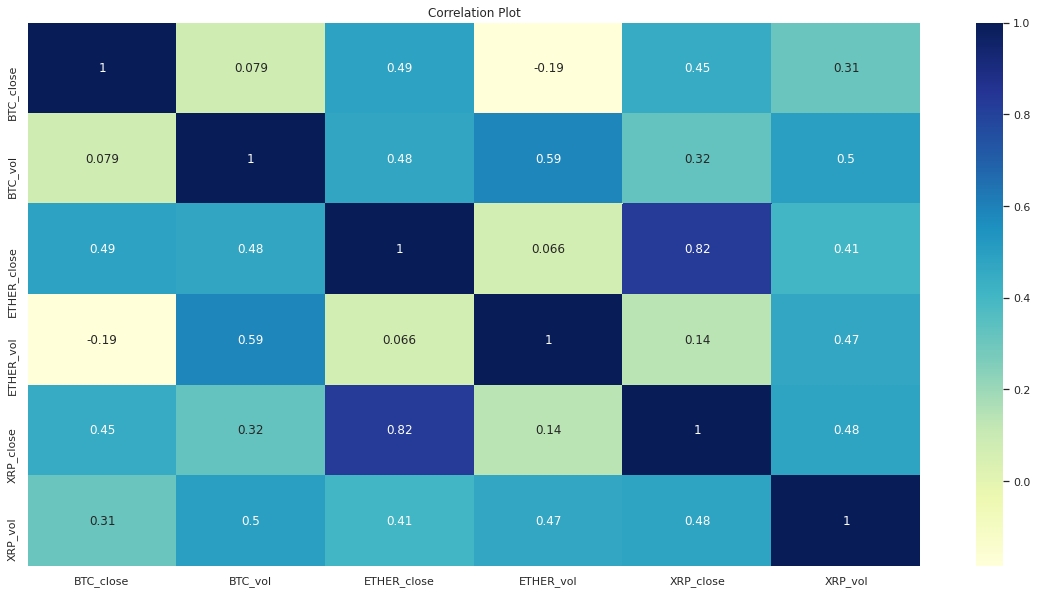

In [ ]:
# Produce a correlation plot of all variables to determine whether there significant correlation between each coin. 

corrMatrix = data.corr()
sns.heatmap(corrMatrix, cmap="YlGnBu", annot=True)
plt.title('Correlation Plot')

# Standard Scaling Plot

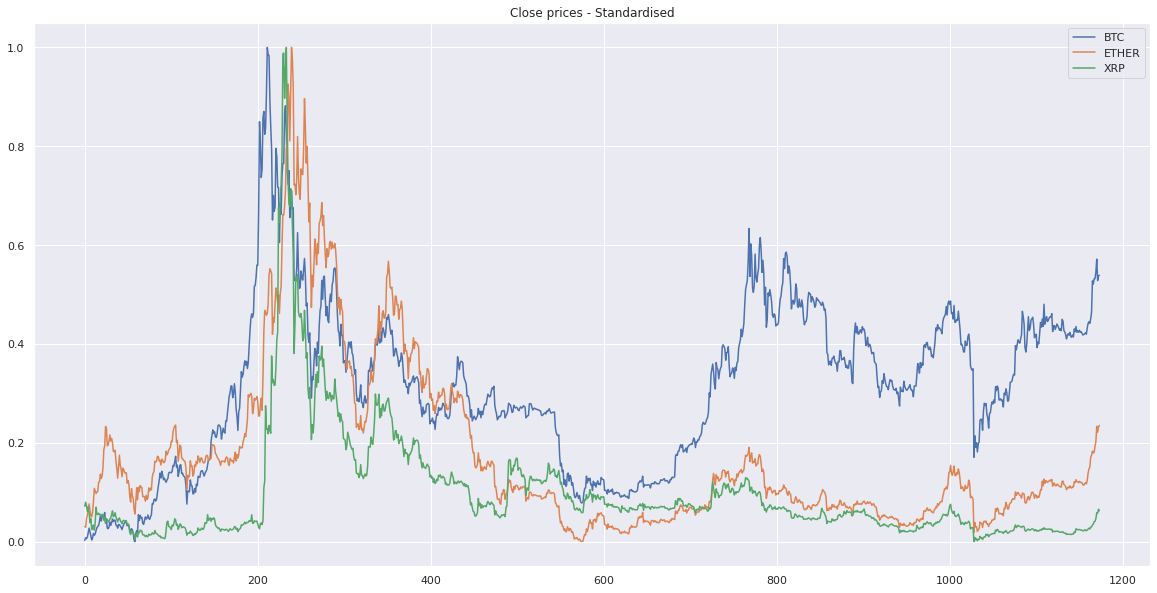

In [ ]:
# Compute the same graph as above but standardise the data first

from sklearn import preprocessing

# Create the Scaler object

scaler = preprocessing.StandardScaler()

min_max_scaler = preprocessing.MinMaxScaler()

data_close_prices = data[['BTC_close', 'XRP_close', 'ETHER_close']]

data_close_prices = pd.DataFrame(min_max_scaler.fit_transform(data_close_prices))

data_close_prices.columns = ["BTC_close", "XRP_close", "ETHER_close"]

# Create the plot of all coin pricing data after scaling function applied

plt.plot(data_close_prices['BTC_close'], label = "BTC") 
plt.plot(data_close_prices['ETHER_close'], label = "ETHER") 
plt.plot(data_close_prices['XRP_close'], label = "XRP") 
plt.title('Close prices - Standardised' )
plt.legend()
plt.show()

# Seasonal Decomposition


We will now apply seasonal decomposition to the various coins pricing data to identify any hidden trends that underlie the data on various time frames. 


In [ ]:
# Convert Date column to Date format.  
df = data 
df["time"] = pd.to_datetime(df["time"], dayfirst=True )  #, format ='%d/%m/%y', errors='ignore'

# Create variables for day of month 
df['Month'] = df['time'].dt.month_name()
df.Month = df.Month.astype('category') 
df['Month'] = df['Month'].cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


#Set Date as Index
df = df.set_index('time')#.asfreq('d')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1174 entries, 2017-05-19 00:00:00+00:00 to 2020-08-04 00:00:00+00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   BTC_close    1174 non-null   float64 
 1   BTC_vol      1174 non-null   float64 
 2   ETHER_close  1174 non-null   float64 
 3   ETHER_vol    1174 non-null   float64 
 4   XRP_close    1174 non-null   float64 
 5   XRP_vol      1174 non-null   float64 
 6   Month        1174 non-null   category
dtypes: category(1), float64(6)
memory usage: 65.8 KB
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,BTC_close,BTC_vol,ETHER_close,ETHER_vol,XRP_close,XRP_vol,Month
time,,,,,,,
2017-05-19 00:00:00+00:00,1966.500000,23001.542773,124.40,257956.362939,0.32498,2.130933e+06,May
2017-05-20 00:00:00+00:00,2059.300000,21690.022393,123.03,122882.371427,0.34716,3.608873e+06,May
2017-05-21 00:00:00+00:00,2026.600000,17221.878675,146.14,220184.308469,0.32700,2.597807e+06,May
2017-05-22 00:00:00+00:00,2087.300000,57231.824243,154.92,473706.454399,0.29717,6.474949e+06,May
2017-05-23 00:00:00+00:00,2249.600000,22521.559138,168.24,144988.858583,0.32158,3.255225e+06,May
...,...,...,...,...,...,...,...
2020-07-31 00:00:00+00:00,11350.000000,5830.145883,346.82,145813.101733,0.25983,1.913230e+07,July
2020-08-01 00:00:00+00:00,11804.744013,10574.542594,387.15,214176.492612,0.29103,5.774864e+07,August
2020-08-02 00:00:00+00:00,11053.772562,13217.636459,371.87,322415.937958,0.28764,9.968299e+07,August


# Remove Ripple and Conduct Further Analysis on BTC and ETH

Text(0.5, 1.0, 'BTC Monthly Behaviour / May 2017 to August 2020')

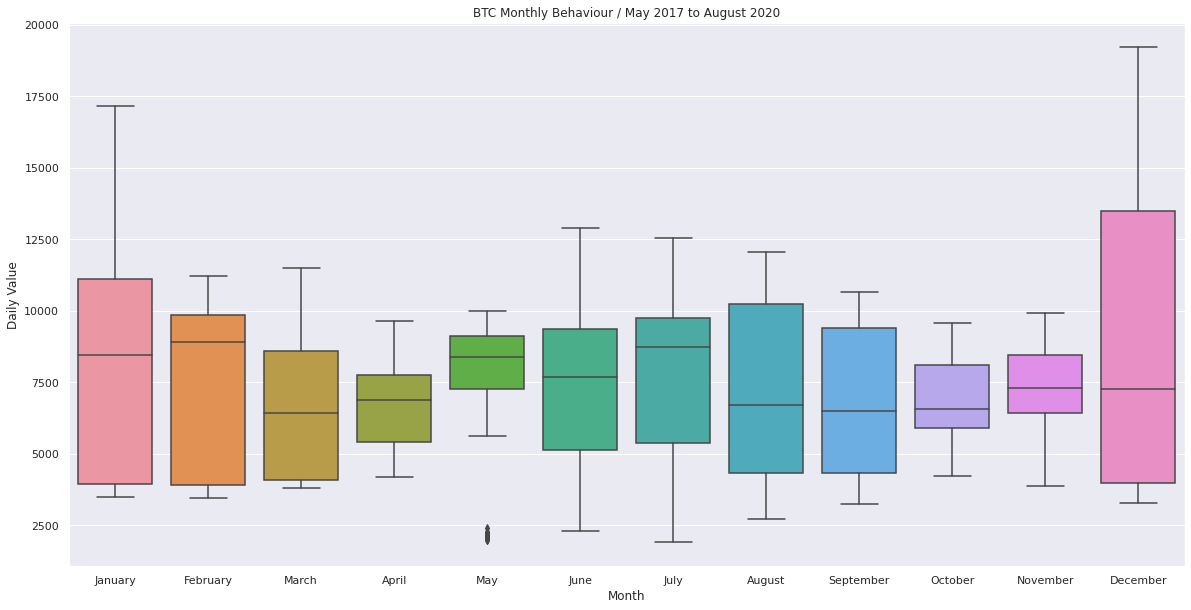

In [ ]:
import matplotlib.dates as mdates
sns.boxplot(data= df, x='Month', y=df.BTC_close, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.ylabel('Daily Value')
plt.title("BTC Monthly Behaviour / May 2017 to August 2020")

Text(0.5, 1.0, 'BTC Monthly Behaviour / March 2018 to August 2020')

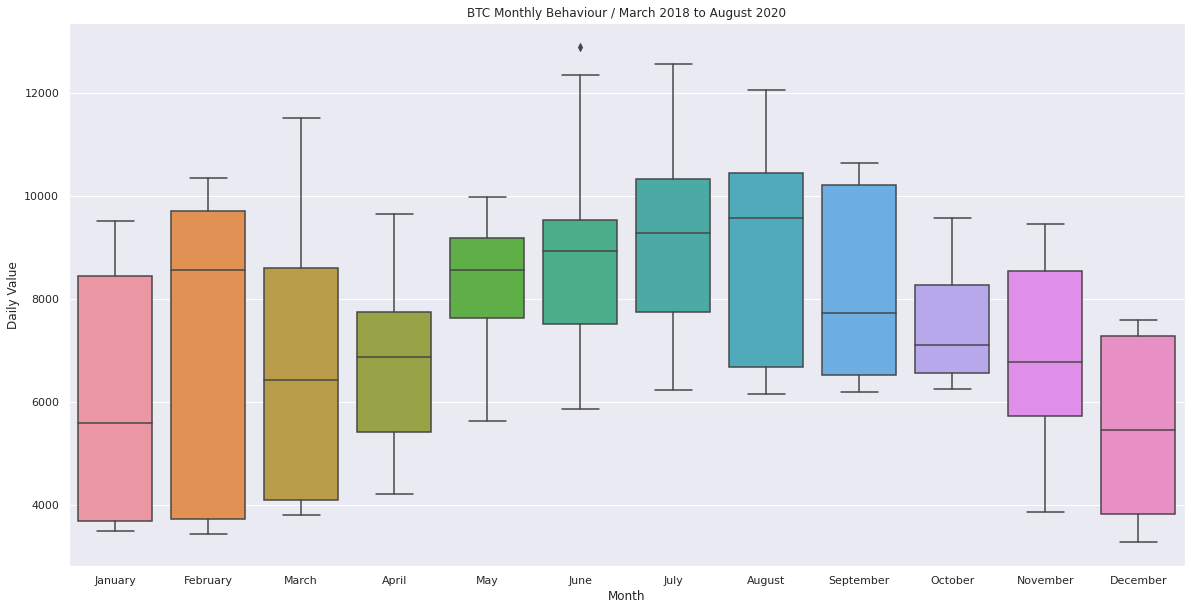

In [ ]:
import matplotlib.dates as mdates


# Subset data to March2018 - today. # COMMENT TO INSPECT ENTIRE DATA SET
df_2018_2020 = df['2018-03-01':'2020-08-02']


sns.boxplot(data= df_2018_2020, x='Month', y=df_2018_2020.BTC_close, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.ylabel('Daily Value')
plt.title("BTC Monthly Behaviour / March 2018 to August 2020")

## Test For Stationarity

In [ ]:
# Import the relevant functions

from statsmodels.tsa.stattools import adfuller, kpss

In [ ]:
# ADF Test
result = adfuller(df.BTC_close.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.BTC_close.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.708959665277366
p-value: 0.07250064680270209
Critial Values:
   1%, -3.4360342309571053
Critial Values:
   5%, -2.864049975956835
Critial Values:
   10%, -2.568106371425197

KPSS Statistic: 0.612605
p-value: 0.021490
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


"ADF: where the null hypothesis is the time series possesses a unit root and is non-stationary. So, id the P-Value in ADH test is less than the significance level (0.05), you reject the null hypothesis."

"KPSS: is used to test for trend stationarity. The null hypothesis and the P-Value interpretation is just the opposite of ADH test." 

ADF: With a p-value > 0.05 we do not have enough evidence to reject the Ho of NON-stationarity

In [ ]:
# ADF Test
result = adfuller(df.ETHER_close.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


# KPSS Test
result = kpss(df.ETHER_close.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.230142333167952
p-value: 0.195487944682253
Critial Values:
   1%, -3.4360490926821727
Critial Values:
   5%, -2.8640565321870635
Critial Values:
   10%, -2.5681098631379964

KPSS Statistic: 1.653638
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [ ]:
# ADF Test
result = adfuller(df.XRP_close.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(df.XRP_close.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -3.7923639850060282
p-value: 0.0029864147999620495
Critial Values:
   1%, -3.4360342309571053
Critial Values:
   5%, -2.864049975956835
Critial Values:
   10%, -2.568106371425197

KPSS Statistic: 0.965858
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


XRP: with a p-value of 0.002> 0.05, there is wnough evidence to reject the Ho of Non-stattionarity

## Seasonal Decomp

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


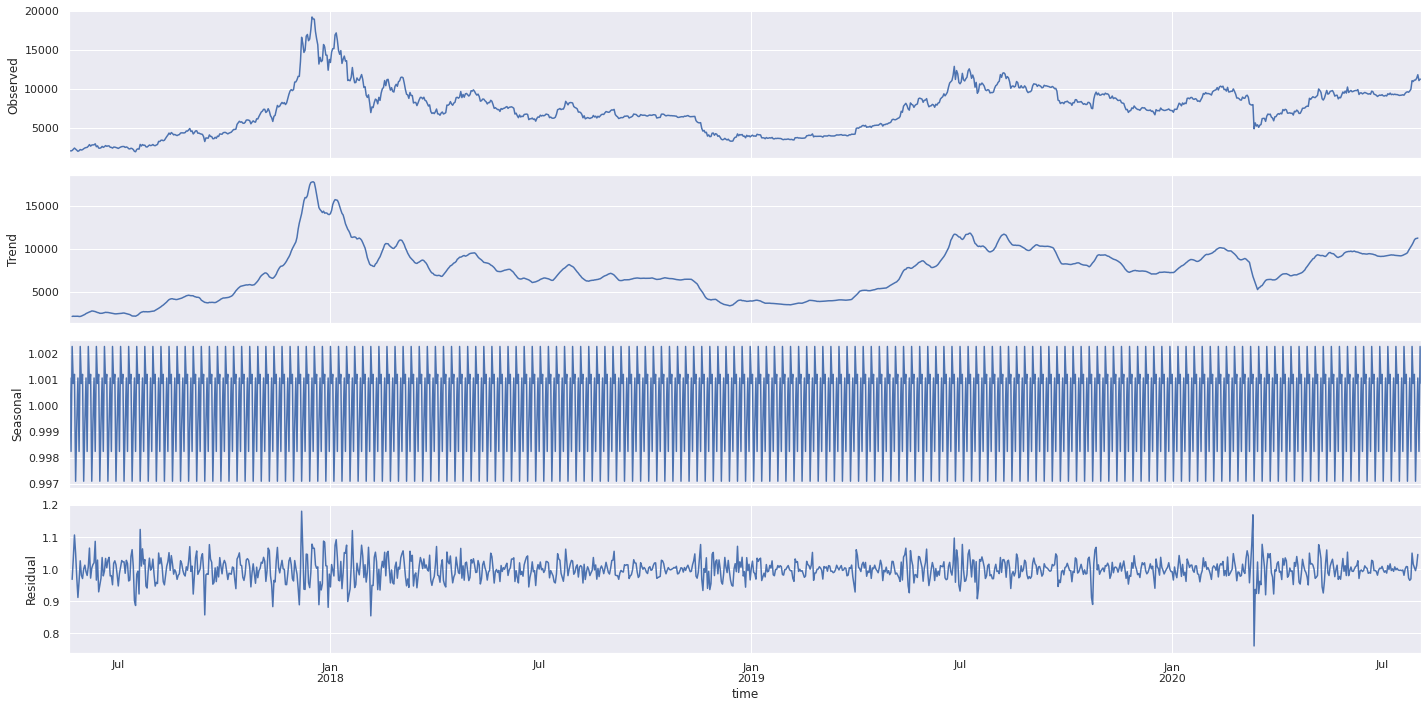

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

#Bitcoin Seasonal Decompose
result = seasonal_decompose(df["BTC_close"], model='multiplicative')
result.plot()
pyplot.show()

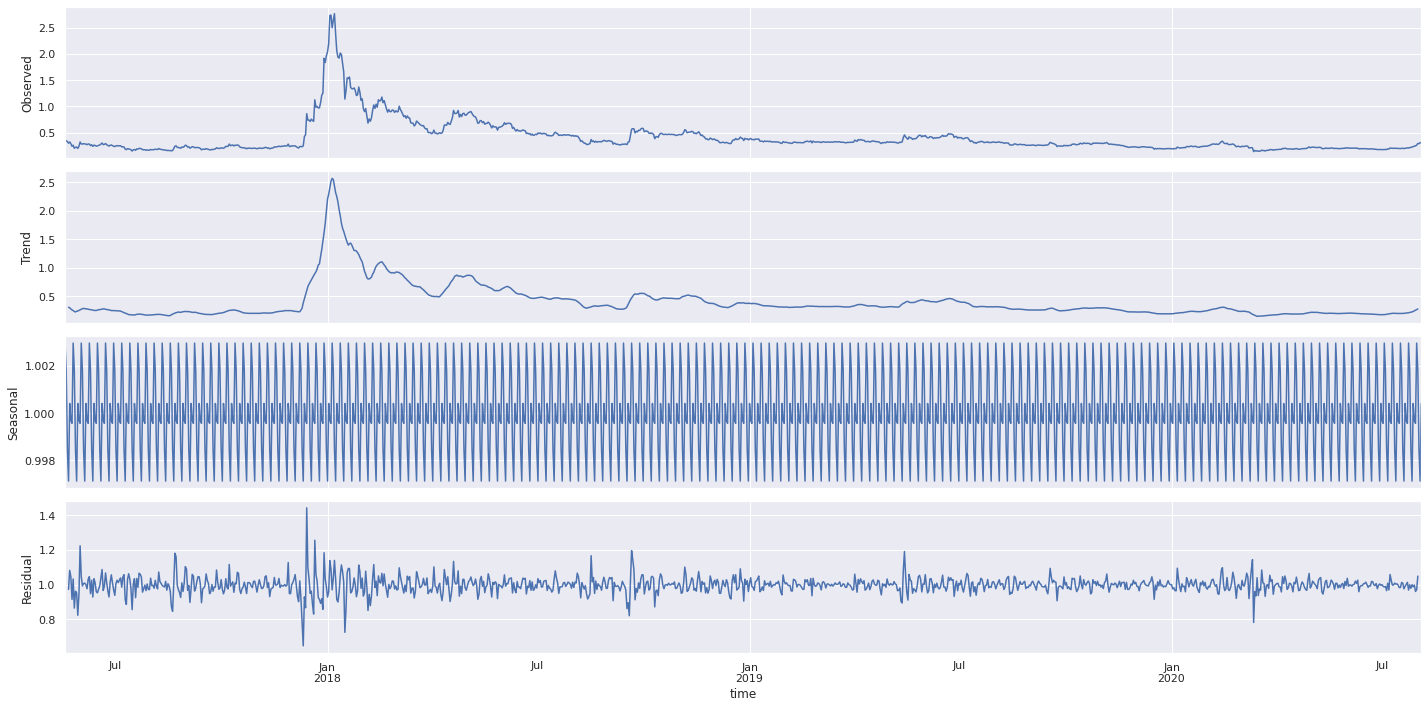

In [ ]:
#Ripple Seasonal Decompose
result = seasonal_decompose(df["XRP_close"], model='multiplicative')
result.plot()
pyplot.show()

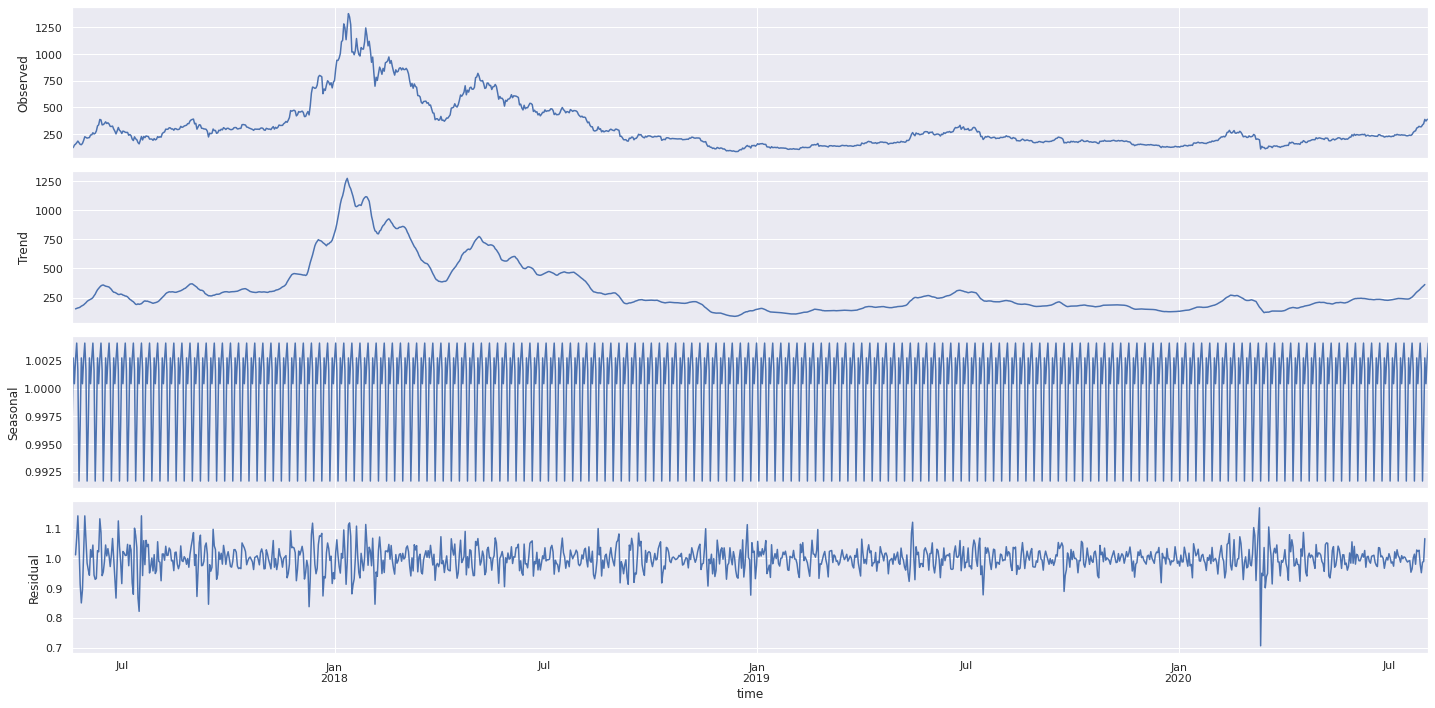

In [ ]:
#Ether Seasonal Decompose
result = seasonal_decompose(df["ETHER_close"], model='multiplicative')
result.plot()
pyplot.show()

## Autocorrelation and Partial correlation

Now we will explore the autocorrelation of the BTC and ETH time series data sets. This will allow us to determine temporal correlation of BTC and ETH prices at present with the past, a necessary determination to be made for time series modelling. 

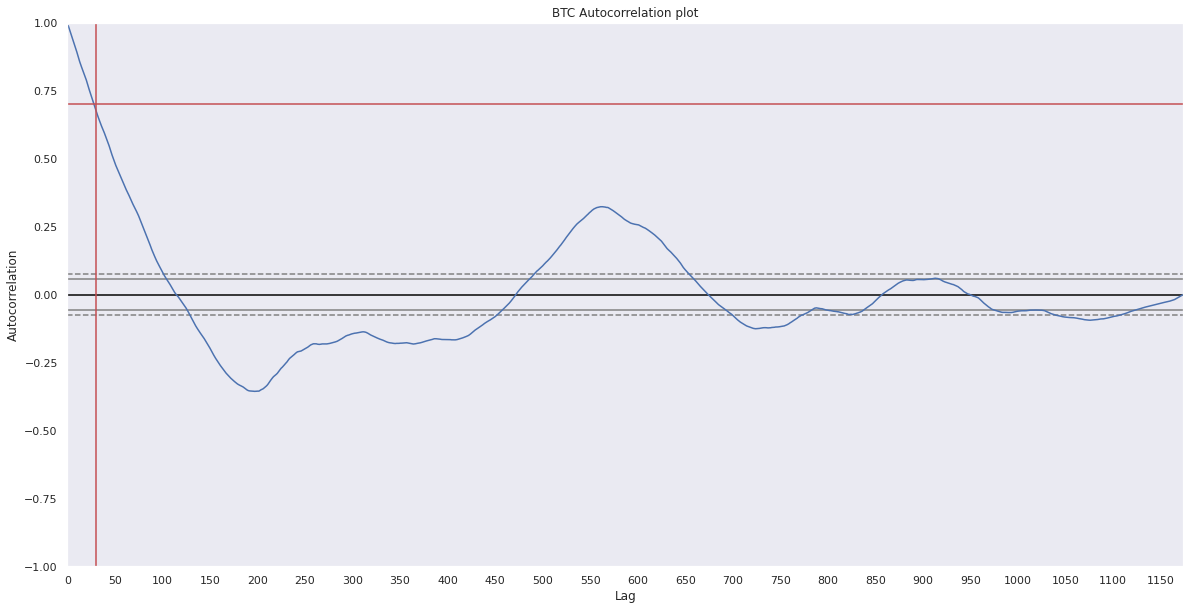

In [ ]:
# Produce the BTC autocorrelation plot 

from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['BTC_close'])
plt.title('BTC Autocorrelation plot')
plt.axhline(y=0.70, color='r', linestyle='-')
plt.axvline(x=30, color='r')
plt.xticks(np.arange(0, 1200, step=50))
plt.show()

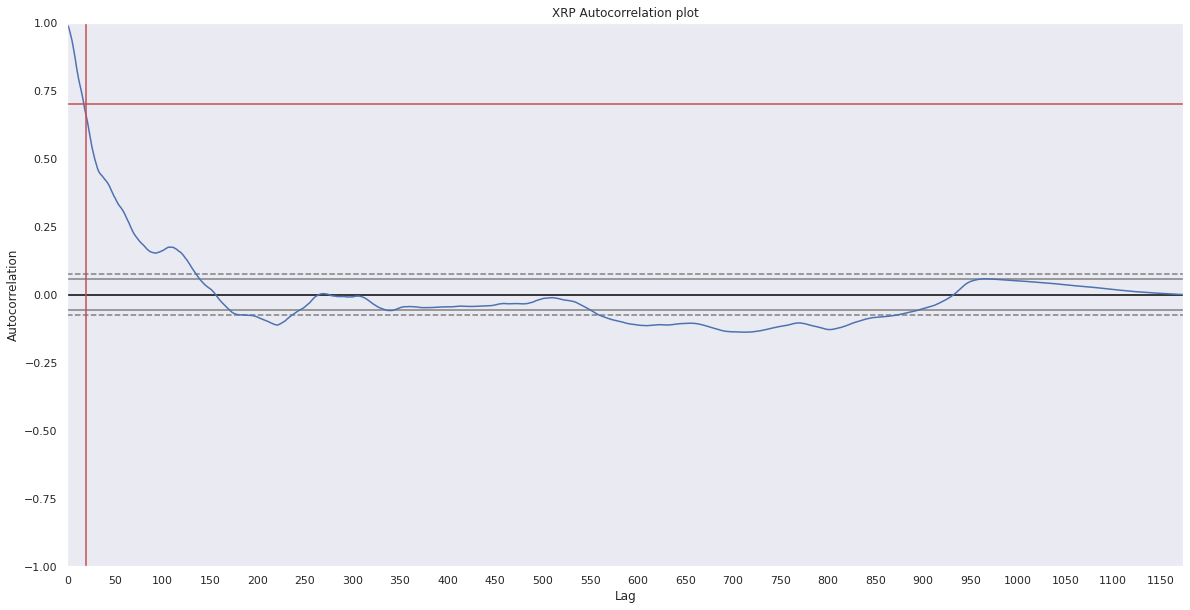

In [ ]:
# Produce the XRP autocorrelation plot 

autocorrelation_plot(df['XRP_close'])
plt.title('XRP Autocorrelation plot')
plt.axhline(y=0.70, color='r', linestyle='-')
plt.axvline(x=20, color='r')
plt.xticks(np.arange(0, 1200, step=50))
plt.show()

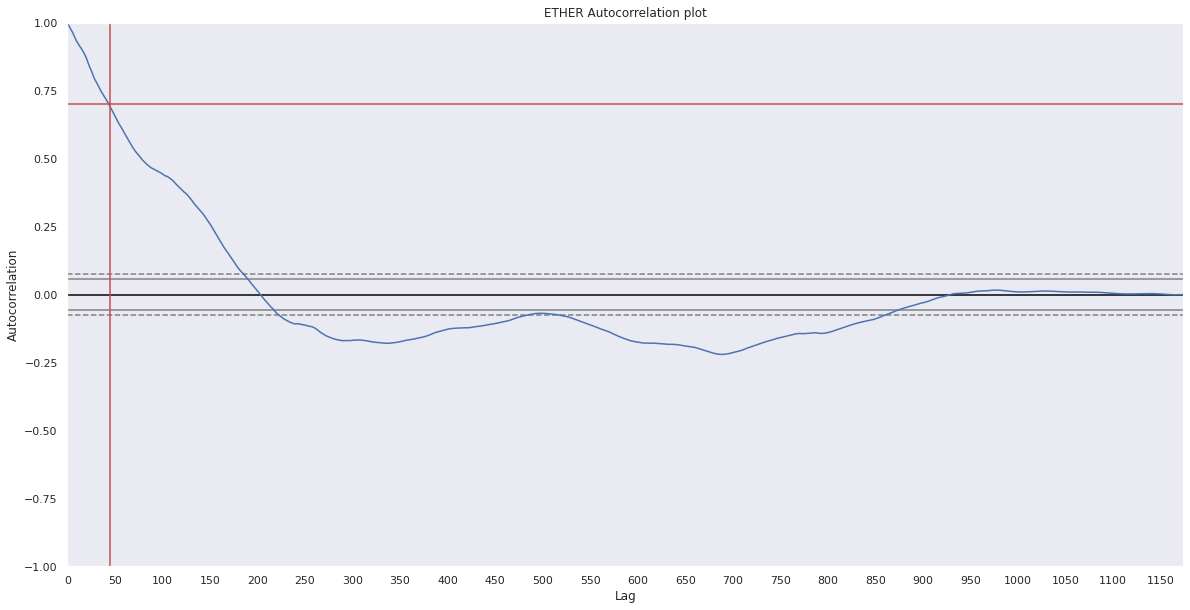

In [ ]:
# Produce the ETH autocorrelation plot 

autocorrelation_plot(df['ETHER_close'])
plt.title('ETHER Autocorrelation plot')
plt.axhline(y=0.70, color='r', linestyle='-')
plt.axvline(x=45, color='r')
plt.xticks(np.arange(0, 1200, step=50))
plt.show()

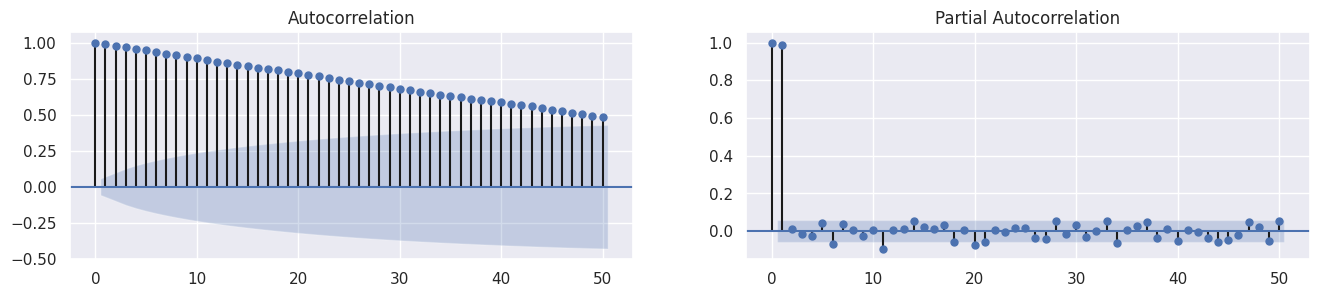

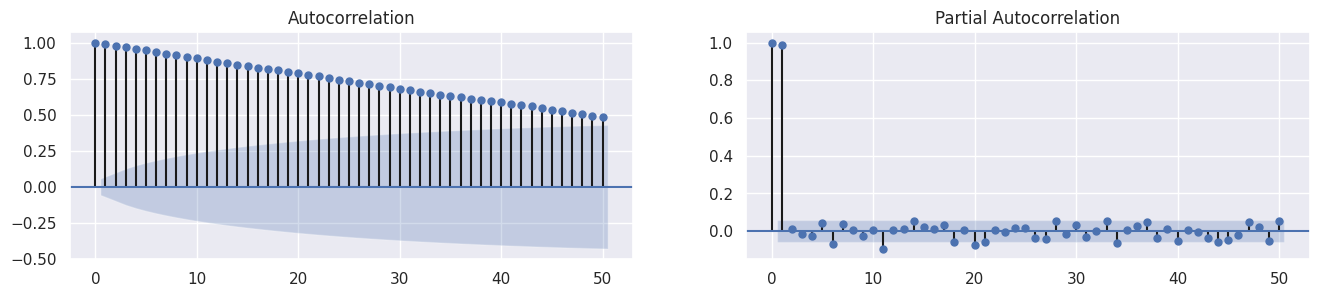

In [ ]:
# Create autocorrelation and partial autocorrelation plots for BTC

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.BTC_close.tolist(), lags=50, ax=axes[0])
plot_pacf(df.BTC_close.tolist(), lags=50, ax=axes[1])

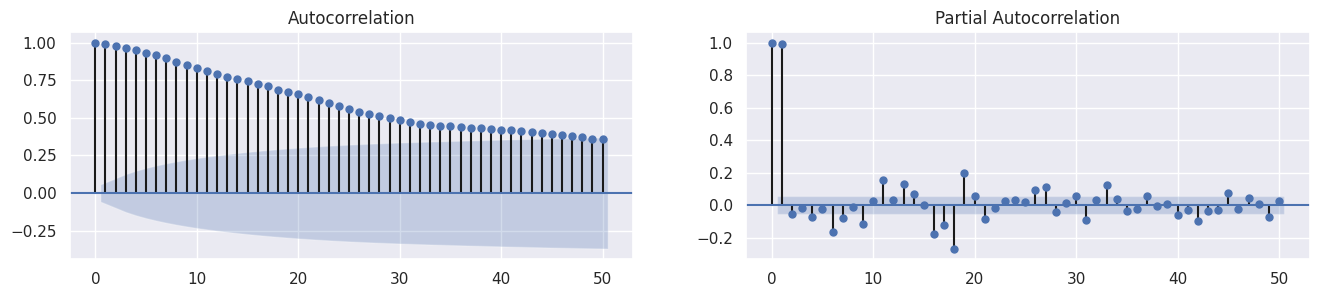

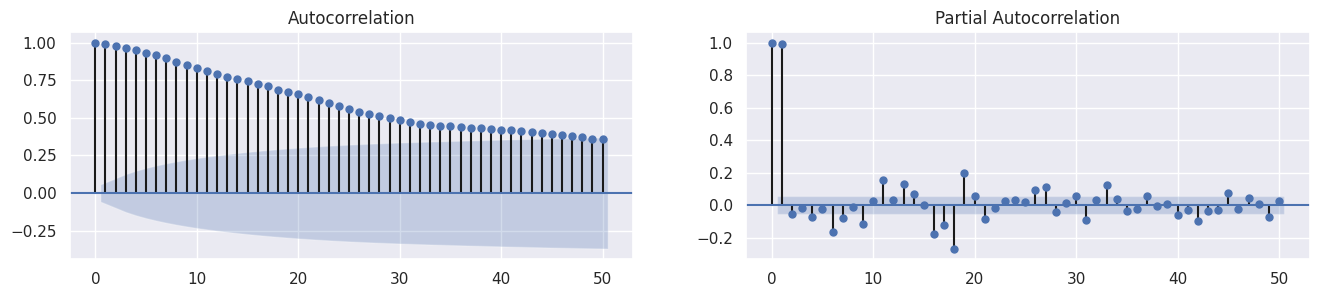

In [ ]:
# Create autocorrelation and partial autocorrelation plots for XRP

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.XRP_close.tolist(), lags=50, ax=axes[0])
plot_pacf(df.XRP_close.tolist(), lags=50, ax=axes[1])

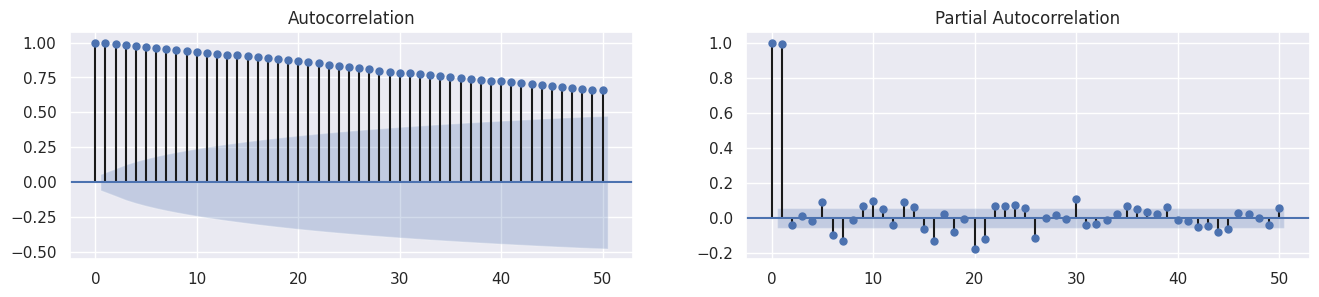

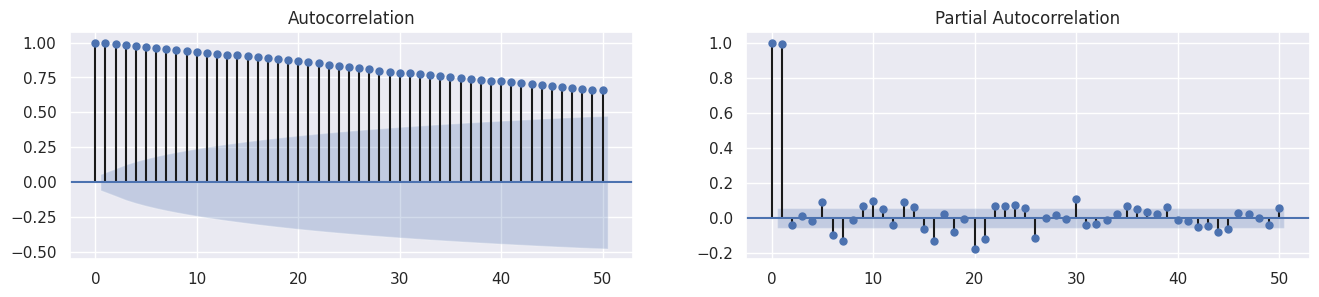

In [ ]:
# Create autocorrelation and partial autocorrelation plots for ETH

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.ETHER_close.tolist(), lags=50, ax=axes[0])
plot_pacf(df.ETHER_close.tolist(), lags=50, ax=axes[1])

# Entropy
The more regular and repeatable patterns a time series has, the easier it is to forecast. The ‘Approximate Entropy’ can be used to quantify the regularity and unpredictability of fluctuations in a time series.

In [ ]:
def ApEn(U, m, r):
    """Compute Aproximate entropy"""
    def _maxdist(x_i, x_j):
        return max([abs(ua - va) for ua, va in zip(x_i, x_j)])

    def _phi(m):
        x = [[U[j] for j in range(i, i + m - 1 + 1)] for i in range(N - m + 1)]
        C = [len([1 for x_j in x if _maxdist(x_i, x_j) <= r]) / (N - m + 1.0) for x_i in x]
        return (N - m + 1.0)**(-1) * sum(np.log(C))

    N = len(U)
    return abs(_phi(m+1) - _phi(m))

print(ApEn(df.BTC_close, m=2, r=0.2*np.std(df.BTC_close)))  
print(ApEn(df.XRP_close, m=2, r=0.2*np.std(df.XRP_close)))  
print(ApEn(df.ETHER_close, m=2, r=0.2*np.std(df.ETHER_close)))    


0.3067037119972227
0.17359357811321718
0.21241723698683757
